<a href="https://colab.research.google.com/github/PoussyAyman/Machine_Learning/blob/main/Assignment2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.datasets import load_iris
from  sklearn import datasets
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
import random

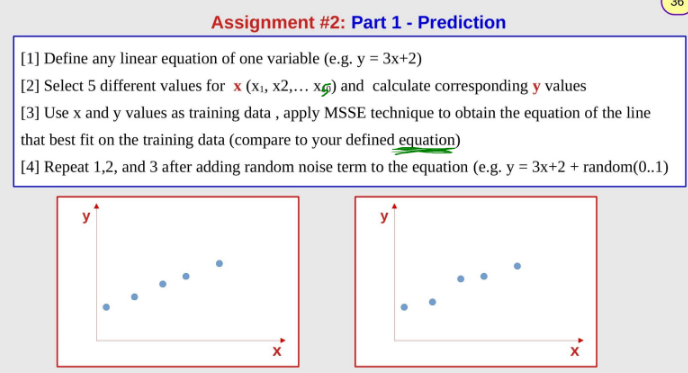

In [ ]:
xvalues = []
yvalues = []
for x in range(0,6):
  y = 3*x+2
  xvalues.append(x)
  yvalues.append(y)


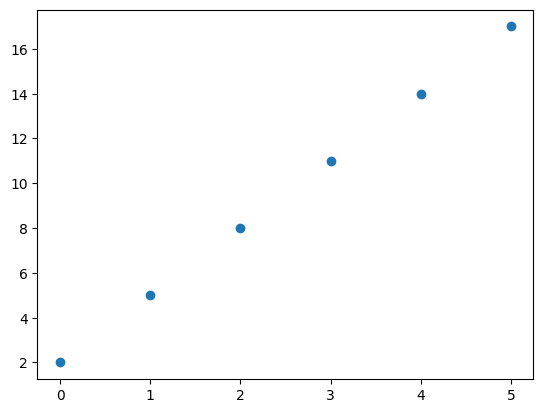

In [ ]:
plt.scatter(xvalues, yvalues)

In [ ]:
values = {'x':xvalues,'y':yvalues}
df = pd.DataFrame(values)
df.head()

x   y
0  0   2
1  1   5
2  2   8
3  3  11
4  4  14

In [ ]:
x =df['x'].to_numpy()
y=df['y'].to_numpy()
print('x values :',x)
print('y values :',y)
x = x.reshape((-1, 1))
y = y.reshape((-1, 1))
print(x)
reg = LinearRegression().fit(x, y)
predictions = reg.predict(x)
print('Predictions:', predictions)

x values : [0 1 2 3 4 5]
y values : [ 2  5  8 11 14 17]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
Predictions: [[ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]
 [17.]]


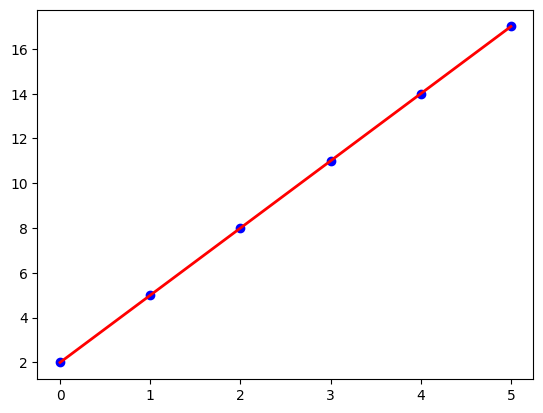

In [ ]:
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, predictions, color='red', linewidth=2, label='Linear Regression')

In [ ]:
xvalues2 = []
yvalues2 = []
for x in range(0,10):
  y = 3*x+2+random.randrange(0,10)
  xvalues2.append(x)
  yvalues2.append(y)

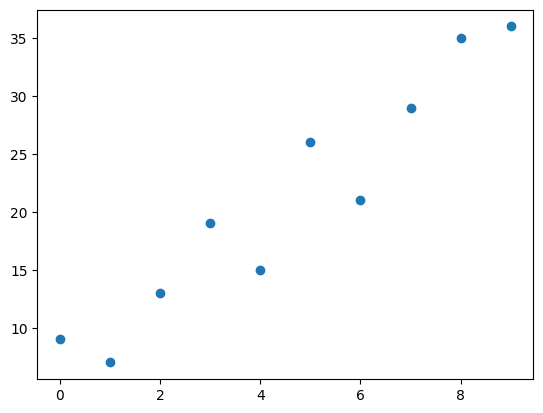

In [ ]:
plt.scatter(xvalues2, yvalues2)

In [ ]:
values2 = {'x2':xvalues2,'y2':yvalues2}
df = pd.DataFrame(values2)
df.head()

x2  y2
0   0   9
1   1   7
2   2  13
3   3  19
4   4  15

In [ ]:
x2 =df['x2'].to_numpy()
y2 =df['y2'].to_numpy()
print('x values :',x)
print('y values :',y)
x2 = x2.reshape((-1, 1))
y2 = y2.reshape((-1, 1))
print(x2)
reg = LinearRegression().fit(x2, y2)
predictions2 = reg.predict(x2)
print('Predictions:', predictions2)

x values : 9
y values : 36
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
Predictions: [[ 6.38181818]
 [ 9.63030303]
 [12.87878788]
 [16.12727273]
 [19.37575758]
 [22.62424242]
 [25.87272727]
 [29.12121212]
 [32.36969697]
 [35.61818182]]


Text(0.5, 1.0, 'Linear Regression')

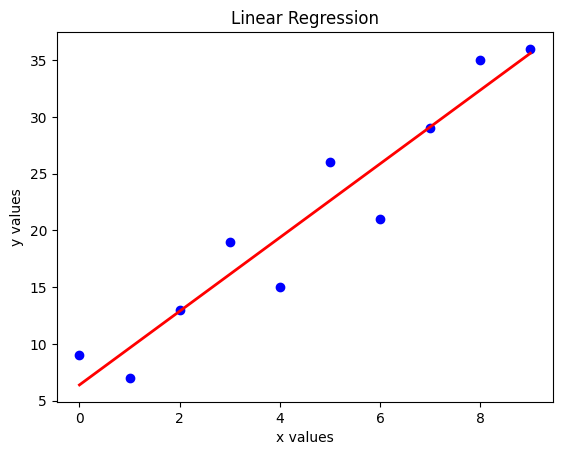

In [ ]:
plt.scatter(x2, y2, color='blue', label='Actual data')
plt.plot(x2, predictions2, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Linear Regression')

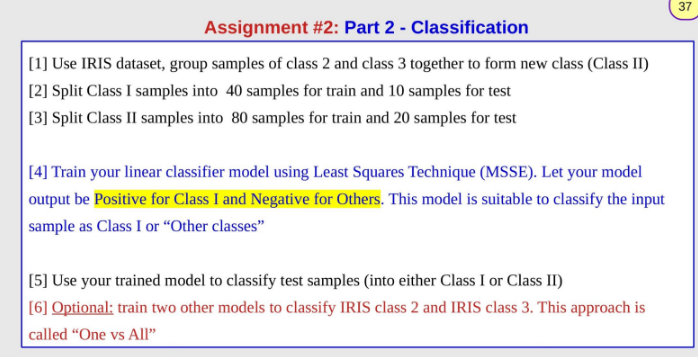

In [ ]:
iris = datasets.load_iris()


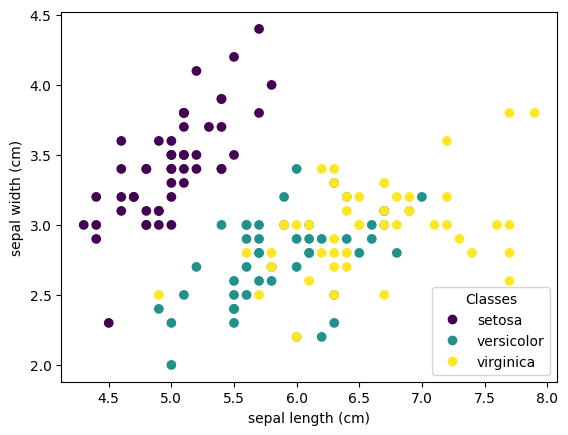

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
iris_df = pd.DataFrame(data = iris.data ,columns = iris)
target_df = pd.DataFrame(data = iris.target,columns =['species'])

ValueError: Shape of passed values is (150, 4), indices imply (150, 8)

In [ ]:
iris_df

In [ ]:
b = np.ones(150)
iris_df['Augmentation'] = b

In [ ]:
iris_df

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(iris_df,target_df,test_size = 0.2)

In [ ]:
#if i found zero ,remove it then put 1 instead else put -1
y1 = np.where(y_train == 0,1,-1)
y2 = np.where(y_train == 1,1,-1)
y3 = np.where(y_train == 2,1,-1)

In [ ]:
y1 = y1.reshape(len(y1))
y2 = y2.reshape(len(y2))
y3 = y3.reshape(len(y3))

In [ ]:
y1

In [ ]:
def pseudoinverse(X):
  X_tr = X.transpose()
  X_ps = np.linalg.inv(X_tr.dot(X)).dot(X_tr)
  return X_ps

In [ ]:
w1 = pseudoinverse(X_train).dot(y1)
w2 = pseudoinverse(X_train).dot(y2)
w3 = pseudoinverse(X_train).dot(y3)

In [ ]:
y1 = np.array(X_test.dot(w1))
y2 = np.array(X_test.dot(w2))
y3 = np.array(X_test.dot(w3))

In [ ]:
def TestModel(X,w1,w2,w3):
  y1 = np.array(X.dot(w1))
  y2 = np.array(X.dot(w2))
  y3 = np.array(X.dot(w3))

  y = []
  for i in range(len(y1)):
    class1=y1[i]> 0 and y2[i]<0 and y3[i]<0
    class2= y1[i]< 0 and y2[i]>0 and y3[i]<0
    class3= y1[i]< 0 and y2[i]<0 and y3[i]>0
    undefined = not(class1^class2^class3)
    y_i = -1
    if(class1): y_i =1
    if(class2): y_i =-1
    if(class3): y_i =-1
    if(undefined): y_i =-1
    y.append(y_i)
  y_arr = np.array(y)
  return y_arr

In [ ]:
predictions =TestModel(X_test,w1 ,w2, w3)

In [ ]:
predictions

Using built in function


In [ ]:
lr = LinearRegression()
iris_model = lr.fit(X_train,y_train)
predictions = iris_model.predict(X_test)


Other solution

In [ ]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [ ]:
iris_df.insert(0, 'augmented', 1)


In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [ ]:
class1 = iris_df[iris_df['target'] == 0]
class2 = iris_df[iris_df['target'].isin([1, 2])]


In [ ]:
train_1,test_1= train_test_split(class1 ,test_size=0.2, random_state=42)
train_2,test_2= train_test_split(class2 ,test_size=0.2, random_state=42)

In [ ]:
train_Class2=train_2*-1

In [ ]:
NPtrain_Class1=train_Class1.to_numpy()
NPtrain_Class2=train_Class2.to_numpy()

In [ ]:
fullTrain=np.concatenate((NPtrain_Class1,NPtrain_Class2), axis=0)
fullTrain

array([[ 4.8,  3. ,  1.4,  0.1,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ],
       [ 4.9,  3.6,  1.4,  0.1,  0. ],
       [ 4.4,  2.9,  1.4,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 4.6,  3.4,  1.4,  0.3,  0. ],
       [ 4.5,  2.3,  1.3,  0.3,  0. ],
       [ 5.1,  3.8,  1.6,  0.2,  0. ],
       [ 4.6,  3.2,  1.4,  0.2,  0. ],
       [ 5.7,  4.4,  1.5,  0.4,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5.4,  3.9,  1.3,  0.4,  0. ],
       [ 4.8,  3.4,  1.9,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.2,  0. ],
       [ 5.4,  3.4,  1.5,  0.4,  0. ],
       [ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 5.1,  3.8,  1.9,  0.4,  0. ],
       [ 5.2,  3.5,  1.5,  0.2,  0. ],
       [ 5.5,  4.2,  1.4,  0.2,  0. ],
       [ 5.4,  3.9,  1.7,  0.4,  0. ],
       [ 4.7,  3.2,  1.6,  0.2,  0. ],
       [ 4.8,  3.4,  1.6,  0.2,  0. ],
       [ 5.5,  3.5,  1.3,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 5.1,  3.7,  1.5,  0.4,  0. ],
       [ 4.7,  3.2,  1.3,

In [ ]:
def MSSE(x):
  ones_column = np.ones((x.shape[0], 1), dtype=x.dtype)
  x_T = x.transpose()
  xx_T=np.matmul(x_T,x)
  xfinalInv = np.linalg.inv(xx_T)
  pseudoInv=np.matmul(xfinalInv,x_T)
  w=np.matmul(pseudoInv,ones_column)
  return w

In [ ]:
MSSE(Train)


array([[ 0.13302696],
       [ 0.11220801],
       [-0.02563188],
       [-0.06786562],
       [ 0.04491793]])

In [ ]:
for i in range(len(test_2)):
  test=test_2.values[i]
  print(np.dot(test,MSSE(Train)))

[1.00956709]
[0.98761226]
[1.06459484]
[0.95070296]
[0.8969513]
[0.86633338]
[0.93611313]
[1.10311861]
[0.77689152]
[1.11969054]
[0.89940078]
[0.87381208]
[0.98311297]
[0.9067337]
[1.02254527]
[1.00407049]
[0.98359427]
[0.99016999]
[0.91954414]
[0.88316183]


In [ ]:
for i in range(len(test_1)):
  test=test_1.values[i]
  print(np.dot(test,MSSE(Train)))

[0.87365831]
[1.00792377]
[0.93179009]
[0.9189091]
[1.01492119]
[1.06819156]
[0.97848476]
[0.94717468]
[1.10655863]
[1.04602041]
